Voici le notebook de la team ØGRID pour le challenge Hunting for exoplanets

Etape un 

Telecharger les datasets 


lien 1 : https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=TOI



lien 2 : https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

Etape 2 : Prétraitement des données 

In [1]:
#Charger le fichier


import pandas as pd

# Remplace 'kepler_data.csv' par le nom de ton fichier
kepler_df = pd.read_csv("cumulative_2025.10.03_10.10.46.csv", comment="#", sep = ",")

# Vérification rapide
print("Shape du DataFrame :", kepler_df.shape)
print(kepler_df.head())

Shape du DataFrame : (9564, 141)
   rowid     kepid kepoi_name   kepler_name koi_disposition koi_vet_stat  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED         Done   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED         Done   
2      3  10811496  K00753.01           NaN       CANDIDATE         Done   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE         Done   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED         Done   

  koi_vet_date koi_pdisposition  koi_score  koi_fpflag_nt  ...  \
0   2018-08-16        CANDIDATE      1.000              0  ...   
1   2018-08-16        CANDIDATE      0.969              0  ...   
2   2018-08-16        CANDIDATE      0.000              0  ...   
3   2018-08-16   FALSE POSITIVE      0.000              0  ...   
4   2018-08-16        CANDIDATE      1.000              0  ...   

   koi_dicco_mdec  koi_dicco_mdec_err  koi_dicco_msky koi_dicco_msky_err  \
0           0.200               0.160

In [2]:
# Lister toutes les colonnes
print("Colonnes disponibles :", kepler_df.columns.tolist())

# Nombre de valeurs non nulles par colonne
print("Valeurs non nulles par colonne :")
print(kepler_df.notna().sum())

Colonnes disponibles : ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1', 'koi_time0_err2', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp', 'koi_longp_err1', 'koi_longp_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_ingress', 'koi_ingress_err1', 'koi_ingress_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_ror', 'koi_ror_err1', 'koi_ror_err2', 'koi_srho', 'koi_srho_err1', 'koi_srho_err2', 'koi_fittype', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_sma', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_er

In [3]:
# Supprimer les lignes où la cible est manquante
kepler_df_clean = kepler_df.dropna(subset=["koi_disposition"])

# Vérification
print("Shape après suppression des lignes sans cible :", kepler_df_clean.shape)

Shape après suppression des lignes sans cible : (9564, 141)


In [4]:
# Colonnes utiles pour les features
features = [
    "ra", "dec",              # Position
    "koi_period",             # Période orbitale
    "koi_prad",               # Rayon de la planète
    "koi_smass",              # Masse de l'étoile
    "koi_srad",               # Rayon de l'étoile
    "koi_dor",                # Durée du transit
    "koi_teq",                # Température d'équilibre
    "koi_insol",              # Insolation reçue
    "koi_score",              # Score de validation
    "koi_pdisposition"        # Validation probabiliste
]

# Cible
target = "koi_disposition"

In [5]:
# Features
X_kepler = kepler_df_clean[features]

# Cible
y_kepler = kepler_df_clean[target]

# Vérification
print("X_kepler shape :", X_kepler.shape)
print("y_kepler shape :", y_kepler.shape)

X_kepler shape : (9564, 11)
y_kepler shape : (9564,)


In [6]:
import pandas as pd

# 1️⃣ Séparer les colonnes numériques et catégorielles
X_num = X_kepler.select_dtypes(include='number')
X_cat = X_kepler.select_dtypes(exclude='number')

# 2️⃣ Remplacer les valeurs manquantes
X_num = X_num.fillna(X_num.mean())
X_cat = X_cat.fillna(X_cat.mode().iloc[0])

# 3️⃣ Encoder les colonnes catégorielles avec One-Hot Encoding
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)
X_cat_encoded.rename(columns={"koi_pdisposition_FALSE POSITIVE": "koi_pdisposition"}, inplace=True)


# 4️⃣ Recomposer le DataFrame final
X_kepler_clean = pd.concat([X_num, X_cat_encoded], axis=1)

# Vérifier
print("Nouvelle forme : ", X_kepler_clean.shape)
print(X_kepler_clean.head())

Nouvelle forme :  (9564, 11)
          ra        dec  koi_period  koi_prad  koi_smass  koi_srad  koi_dor  \
0  291.93423  48.141651    9.488036      2.26      0.919     0.927   24.810   
1  291.93423  48.141651   54.418383      2.83      0.919     0.927   77.900   
2  297.00482  48.134129   19.899140     14.60      0.961     0.868   53.500   
3  285.53461  48.285210    1.736952     33.46      0.836     0.791    3.278   
4  288.75488  48.226200    2.525592      2.75      1.095     1.046    8.750   

   koi_teq  koi_insol  koi_score  koi_pdisposition  
0    793.0      93.59      1.000             False  
1    443.0       9.11      0.969             False  
2    638.0      39.30      0.000             False  
3   1395.0     891.96      0.000              True  
4   1406.0     926.16      1.000             False  


C:\Users\HP\AppData\Local\Temp\ipykernel_29716\321353055.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_kepler['koi_pdisposition'] = X_kepler['koi_pdisposition'].map({'FALSE POSITIVE': 0, 'CANDIDATE': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_29716\321353055.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_kepler[numeric_cols] = imputer.fit_transform(X_kepler[numeric_cols])


Valeurs manquantes avant imputation :
ra                     0
dec                    0
koi_period             0
koi_prad             363
koi_smass            363
koi_srad             363
koi_dor              363
koi_teq              363
koi_insol            321
koi_score           1510
koi_pdisposition       0
dtype: int64

Valeurs manquantes après imputation :
ra                  0
dec                 0
koi_period          0
koi_prad            0
koi_smass           0
koi_srad            0
koi_dor             0
koi_teq             0
koi_insol           0
koi_score           0
koi_pdisposition    0
dtype: int64

Shape du dataset : (9564, 11)
Shape de la cible : (9564,)

Types de données :
ra                  float64
dec                 float64
koi_period          float64
koi_prad            float64
koi_smass           float64
koi_srad            float64
koi_dor             float64
koi_teq             float64
koi_insol           float64
koi_score           float64
koi_pdisposition    f

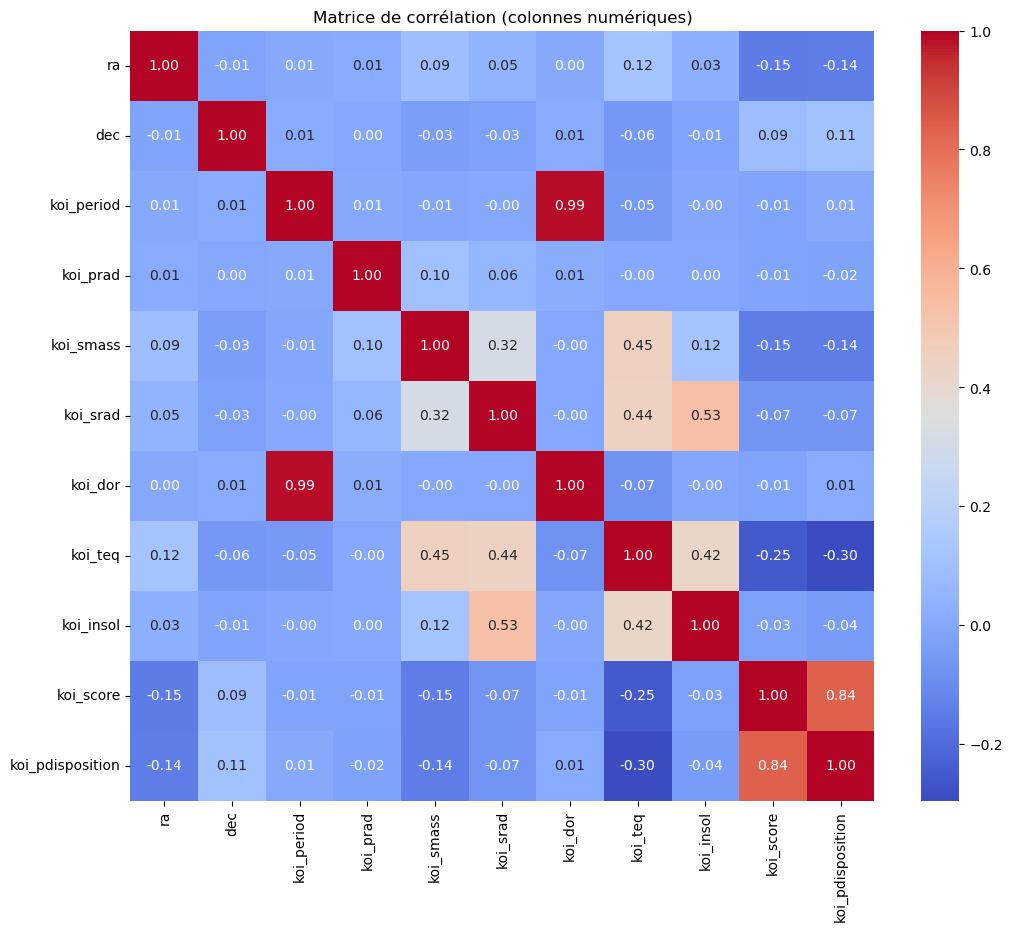


Distribution des classes :
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


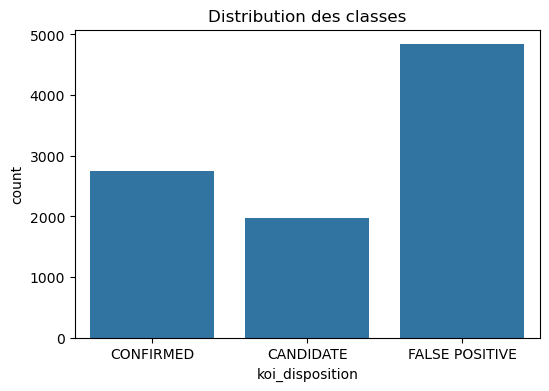

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# -------------------------------
# 1️⃣ Nettoyage et préparation
# -------------------------------

# 1️⃣.1 Encoder la colonne cible si nécessaire
# Ici 'koi_pdisposition' contient 'CANDIDATE' et 'FALSE POSITIVE'
X_kepler['koi_pdisposition'] = X_kepler['koi_pdisposition'].map({'FALSE POSITIVE': 0, 'CANDIDATE': 1})

# 1️⃣.2 Vérifier les valeurs manquantes
print("Valeurs manquantes avant imputation :")
print(X_kepler.isna().sum())

# 1️⃣.3 Imputer les valeurs manquantes par la médiane (numérique)
numeric_cols = X_kepler.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='median')
X_kepler[numeric_cols] = imputer.fit_transform(X_kepler[numeric_cols])

print("\nValeurs manquantes après imputation :")
print(X_kepler.isna().sum())

# -------------------------------
# 2️⃣ Analyse descriptive
# -------------------------------
print("\nShape du dataset :", X_kepler.shape)
print("Shape de la cible :", y_kepler.shape)

print("\nTypes de données :")
print(X_kepler.dtypes)

print("\nStatistiques descriptives :")
print(X_kepler.describe())

# -------------------------------
# 3️⃣ Corrélations
# -------------------------------
plt.figure(figsize=(12,10))
sns.heatmap(X_kepler.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation (colonnes numériques)")
plt.show()

# -------------------------------
# 4️⃣ Distribution de la cible
# -------------------------------
print("\nDistribution des classes :")
print(y_kepler.value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=y_kepler)
plt.title("Distribution des classes")
plt.show()

In [8]:
X = X_kepler.drop('koi_pdisposition', axis=1)  # Features
y = X_kepler['koi_pdisposition']              # Cible

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Shape du dataset : (9564, 10)
Shape de la cible : (9564,)

Types de données :
ra            float64
dec           float64
koi_period    float64
koi_prad      float64
koi_smass     float64
koi_srad      float64
koi_dor       float64
koi_teq       float64
koi_insol     float64
koi_score     float64
dtype: object

Valeurs manquantes par colonne :
ra            0
dec           0
koi_period    0
koi_prad      0
koi_smass     0
koi_srad      0
koi_dor       0
koi_teq       0
koi_insol     0
koi_score     0
dtype: int64

Statistiques descriptives :
                ra          dec     koi_period       koi_prad    koi_smass  \
count  9564.000000  9564.000000    9564.000000    9564.000000  9564.000000   
mean    292.060163    43.810433      75.671358      99.077250     1.021820   
std       4.766657     3.601243    1334.744046    3018.723391     0.342882   
min     279.852720    36.577381       0.241843       0.080000     0.000000   
25%     288.660770    40.777173       2.733684       1.430000 

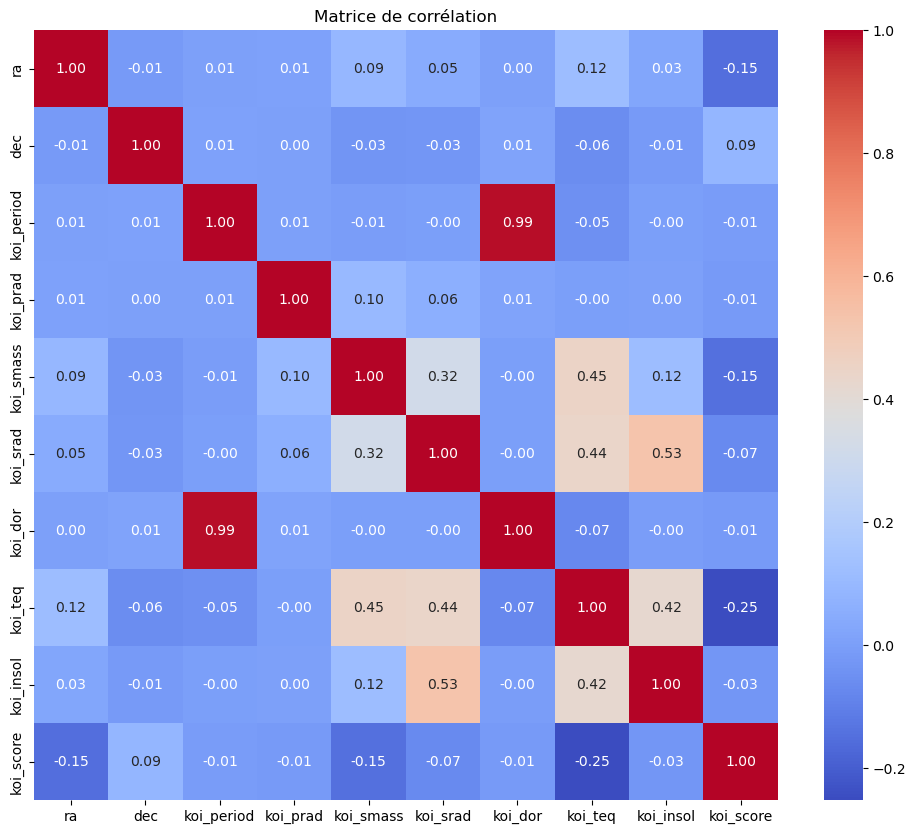


Distribution des classes :
koi_pdisposition
0.0    4847
1.0    4717
Name: count, dtype: int64


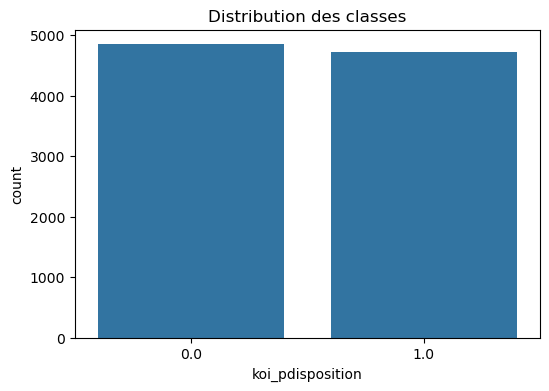

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# -------------------------------
# Vérification des dimensions
# -------------------------------
print("Shape du dataset :", X.shape)
print("Shape de la cible :", y.shape)

# -------------------------------
# Types de données
# -------------------------------
print("\nTypes de données :")
print(X.dtypes)

# -------------------------------
# Valeurs manquantes
# -------------------------------
print("\nValeurs manquantes par colonne :")
print(X.isna().sum())

# Imputation des valeurs manquantes avec la médiane
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# -------------------------------
# Statistiques descriptives après imputation
# -------------------------------
print("\nStatistiques descriptives :")
print(X_imputed.describe())

# -------------------------------
# Corrélations
# -------------------------------
plt.figure(figsize=(12,10))
sns.heatmap(X_imputed.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# -------------------------------
# Vérification de la cible
# -------------------------------
print("\nDistribution des classes :")
print(y.value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution des classes")
plt.show()

In [11]:
# Pipeline complet et cohérent pour la classification multi-classe Kepler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report)

In [12]:
# 1️⃣ Chargement et nettoyage des données
kepler_df = pd.read_csv("cumulative_2025.10.03_10.10.46.csv", comment="#", sep=",")
kepler_df_clean = kepler_df.dropna(subset=["koi_disposition"])
# On ne garde que les valeurs cibles attendues
valid_values = ["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"]
mask = kepler_df_clean["koi_disposition"].isin(valid_values)
kepler_df_clean = kepler_df_clean[mask]

In [13]:
# 2️⃣ Sélection des features et de la cible
features = [
    "ra", "dec", "koi_period", "koi_prad", "koi_smass", "koi_srad",
    "koi_dor", "koi_teq", "koi_insol", "koi_score", "koi_pdisposition"
 ]
target = "koi_disposition"
X = kepler_df_clean[features].copy()
y = kepler_df_clean[target].copy()

In [14]:
# 3️⃣ Prétraitement des features
# Séparer numériques/catégorielles
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')
X_num = X_num.fillna(X_num.median())
if not X_cat.empty:
    X_cat = X_cat.fillna(X_cat.mode().iloc[0])
    X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)
    X_cat_encoded.rename(columns={"koi_pdisposition_FALSE POSITIVE": "koi_pdisposition"}, inplace=True)
    X_clean = pd.concat([X_num, X_cat_encoded], axis=1)
else:
    X_clean = X_num

In [15]:
# 4️⃣ Encodage de la cible multi-classe
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0, 1, 2 pour les 3 classes

In [16]:
# 5️⃣ Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [17]:
# 6️⃣ Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
"""
# 7️⃣ Entraînement du modèle avec recherche d'hyperparamètres (GridSearchCV)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_
print("Meilleurs paramètres :", grid_search.best_params_)

# 8️⃣ Prédictions et probabilités avec le meilleur modèle
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)  # shape: (n_samples, n_classes)

# 9️⃣ Évaluation complète
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

"""

'\n# 7️⃣ Entraînement du modèle avec recherche d\'hyperparamètres (GridSearchCV)\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\', None]\n}\n\nrf = RandomForestClassifier(random_state=42)\ngrid_search = GridSearchCV(\n    estimator=rf,\n    param_grid=param_grid,\n    cv=5,\n    scoring=\'f1_weighted\',\n    n_jobs=-1,\n    verbose=2\n)\n\ngrid_search.fit(X_train_scaled, y_train)\nbest_rf = grid_search.best_estimator_\nprint("Meilleurs paramètres :", grid_search.best_params_)\n\n# 8️⃣ Prédictions et probabilités avec le meilleur modèle\ny_pred = best_rf.predict(X_test_scaled)\ny_proba = best_rf.predict_proba(X_test_scaled)  # shape: (n_samples, n_classes)\n\n# 9️⃣ Évaluation complète\nacc = accuracy_score(y_test, y_pred)\nprecision = precision_score(y_test, y_pred, average=

In [19]:
# 7️⃣ Entraînement du modèle avec paramètres optimisés manuellement
from sklearn.ensemble import RandomForestClassifier

# Paramètres solides basés sur les bonnes pratiques
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=1
)


print("Entraînement du modèle...")
best_rf.fit(X_train_scaled, y_train)
print("✓ Modèle entraîné")

# 8️⃣ Prédictions
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)

# 9️⃣ Évaluation
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPerformances:")
print(f"  Accuracy:  {acc*100:.2f}%")
print(f"  Precision: {precision*100:.2f}%")
print(f"  Recall:    {recall*100:.2f}%")
print(f"  F1-Score:  {f1*100:.2f}%")

Entraînement du modèle...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


✓ Modèle entraîné

Performances:
  Accuracy:  90.85%
  Precision: 90.81%
  Recall:    90.85%
  F1-Score:  90.82%


In [20]:
print("***********************" )
print(X_train_scaled)
print("***********************" )

***********************
[[ 0.56038339  1.57950739  0.18001294 ... -0.04722122 -1.03965531
   0.98636919]
 [-1.30462503 -1.1432612  -0.47434849 ... -0.04137642 -1.03965531
   0.98636919]
 [-0.47955335  0.16280852 -0.47084687 ... -0.04506273  1.19219368
  -1.01381917]
 ...
 [-0.47578581 -0.01535324 -0.48912136 ... -0.00777969  1.22621576
  -1.01381917]
 [ 1.03954692  0.62823617 -0.44361791 ... -0.0468196   1.2284839
  -1.01381917]
 [-1.21880705 -1.78727079 -0.17893544 ... -0.04729136  1.2284839
  -1.01381917]]
***********************


In [21]:
import pickle

# ============================
# 🔧 1. Vérification du modèle
# ============================
# Si tu as utilisé GridSearchCV
if hasattr(best_rf, "best_estimator_"):
    rf_model = best_rf.best_estimator_
else:
    rf_model = best_rf

# ============================
# 💾 2. Sauvegarde du modèle
# ============================
print("Sauvegarde des fichiers...")

with open('exoplanet_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("✓ Modèle sauvegardé : exoplanet_model.pkl")

# ============================
# 💾 3. Sauvegarde du scaler
# ============================
with open('exoplanet_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler sauvegardé : exoplanet_scaler.pkl")

# ============================
# 📋 4. Sauvegarde des métadonnées
# ============================
metadata = {
    'feature_names': features,
    'classes': rf_model.classes_.tolist(),
    'model_info': {
        'n_features': len(features),
        'n_estimators': getattr(rf_model, "n_estimators", "N/A"),
        'algorithm': type(rf_model).__name__
    }
}

with open('model_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

print("✓ Métadonnées sauvegardées : model_metadata.pkl")

# ============================
# ✅ 5. Résumé final
# ============================
print("\n🎯 Tous les fichiers ont été sauvegardés avec succès !")
print(f"Modèle entraîné : {type(rf_model).__name__}")
print(f"Nombre de features attendues : {rf_model.n_features_in_}")
print(f"Features utilisées : {features}")


Sauvegarde des fichiers...
✓ Modèle sauvegardé : exoplanet_model.pkl
✓ Scaler sauvegardé : exoplanet_scaler.pkl
✓ Métadonnées sauvegardées : model_metadata.pkl

🎯 Tous les fichiers ont été sauvegardés avec succès !
Modèle entraîné : RandomForestClassifier
Nombre de features attendues : 11
Features utilisées : ['ra', 'dec', 'koi_period', 'koi_prad', 'koi_smass', 'koi_srad', 'koi_dor', 'koi_teq', 'koi_insol', 'koi_score', 'koi_pdisposition']


In [22]:
# ROC-AUC multi-classe (one-vs-rest)
lb = LabelBinarizer()
lb.fit(y_train)
y_test_binarized = lb.transform(y_test)
y_proba_binarized = y_proba

print("y_test_binarized shape :", y_test_binarized.shape)
print("y_proba_binarized shape :", y_proba_binarized.shape)
if y_test_binarized.shape == y_proba_binarized.shape:
    roc_auc = roc_auc_score(y_test_binarized, y_proba_binarized, average='macro', multi_class='ovr')
else:
    print("Erreur : les dimensions de y_test_binarized et y_proba_binarized ne correspondent pas.")
    roc_auc = None

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print("Accuracy :", acc)
print("Précision (pondérée) :", precision)
print("Rappel (pondéré) :", recall)
print("F1-score (pondéré) :", f1)
print("ROC-AUC (macro, multi-classe) :", roc_auc)
print("\nMatrice de confusion :\n", cm)
print("\nRapport complet :\n", report)



y_test_binarized shape : (1913, 3)
y_proba_binarized shape : (1913, 3)
Accuracy : 0.9085206481965499
Précision (pondérée) : 0.9081031426800581
Rappel (pondéré) : 0.9085206481965499
F1-score (pondéré) : 0.9081995237747831
ROC-AUC (macro, multi-classe) : 0.9756465523270728

Matrice de confusion :
 [[301  95   0]
 [ 79 469   1]
 [  0   0 968]]

Rapport complet :
                 precision    recall  f1-score   support

     CANDIDATE       0.79      0.76      0.78       396
     CONFIRMED       0.83      0.85      0.84       549
FALSE POSITIVE       1.00      1.00      1.00       968

      accuracy                           0.91      1913
     macro avg       0.87      0.87      0.87      1913
  weighted avg       0.91      0.91      0.91      1913



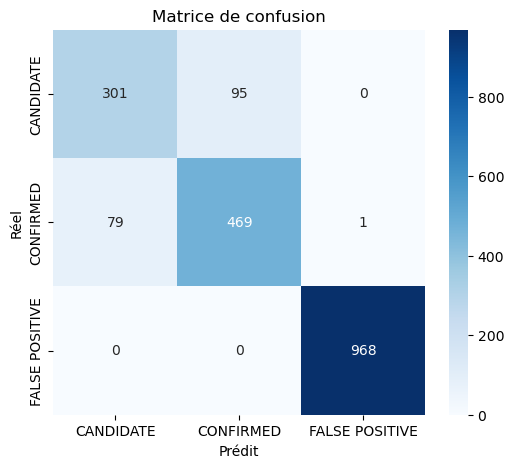

In [23]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

In [24]:
import pickle

# Sauvegarde le modèle
with open("exoplanet_model_vf.pkl", "wb") as f:
    pickle.dump(best_rf, f)

# Sauvegarde le scaler
with open("exoplanet_scaler_vf.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Sauvegarde le label encoder
with open("label_encoder_vf.pkl", "wb") as f:
    pickle.dump(le, f)